# Logistic Regression and Naive-Baye's

In [58]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, auc

In [59]:
#Load the dataset
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv('diabetes.csv', names=columns)
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [60]:
#checking for Null Values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [61]:
#Preparing the X and Y's
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [62]:
#Splitting the Data as 80, 20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [63]:
#Standarizing the Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Trianing the Logistic Model

In [64]:
#Fitting the LG model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [65]:
#Predicting for X_test
y_pred_lg = log_reg.predict(X_test)

In [66]:
#Printing the Metics
print("Accuracy :",accuracy_score(y_test, y_pred_lg))
print("confusionMatrix :\n", confusion_matrix(y_test, y_pred_lg))
print("classificationReport :\n", classification_report(y_test, y_pred_lg))

Accuracy : 0.8246753246753247
confusionMatrix :
 [[98  9]
 [18 29]]
classificationReport :
               precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154



Text(0.5, 1.0, 'Confusion Matrix for LogisticRegression')

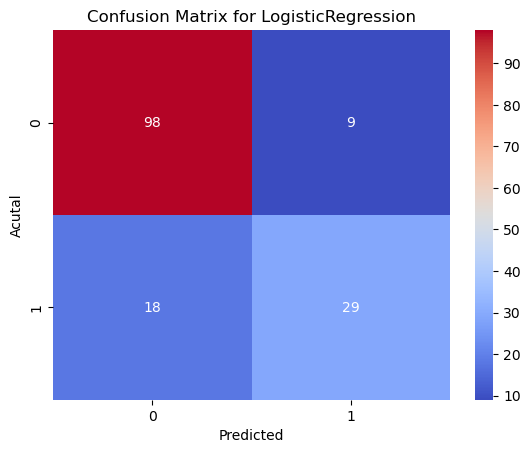

In [67]:
#Confusion_Matrix
cm = confusion_matrix(y_test, y_pred_lg)

#Plot the heatmap
sns.heatmap(cm, annot=True, cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Acutal')
plt.title('Confusion Matrix for LogisticRegression')

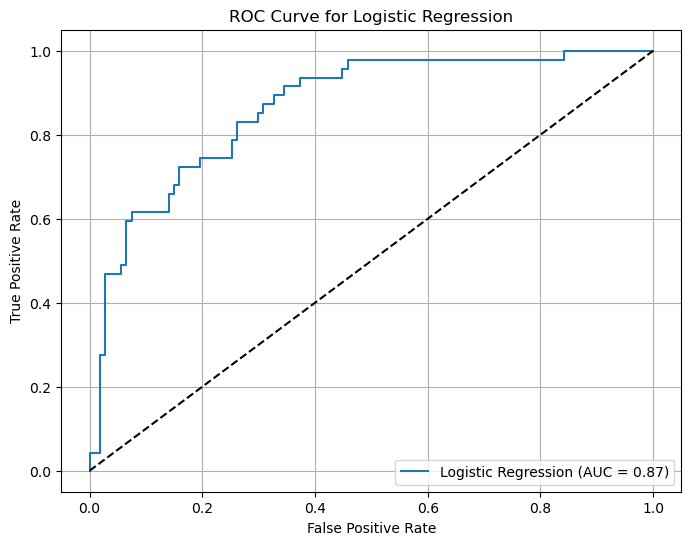

In [68]:
#ROC and AUC curve
y_prob = log_reg.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc:.2f})")
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## Naive_Bayes

In [69]:
#Loadint and Fitting the NB model in Training Set
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [70]:
#Predicting for X_test
y_pred_nb = nb_classifer.predict(X_test)

In [71]:
#Printing the Metrics
print("Naive Bayes Accuracy :", accuracy_score(y_test, y_pred_nb))
print("Naive Bayes Confusion Matrix :\n", confusion_matrix(y_test, y_pred_nb))
print("Naive Bayes Classification Report :\n", classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy : 0.7922077922077922
Naive Bayes Confusion Matrix :
 [[93 14]
 [18 29]]
Naive Bayes Classification Report :
               precision    recall  f1-score   support

           0       0.84      0.87      0.85       107
           1       0.67      0.62      0.64        47

    accuracy                           0.79       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.79      0.79      0.79       154



Text(0.5, 1.0, 'Confusion Matrix for Naive-Bayes')

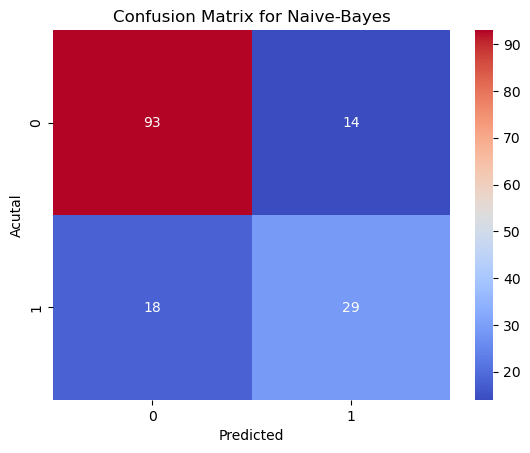

In [72]:
#Confusion_Matrix
cm = confusion_matrix(y_test, y_pred_nb)

#Plot the heatmap
sns.heatmap(cm, annot=True, cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Acutal')
plt.title('Confusion Matrix for Naive-Bayes')

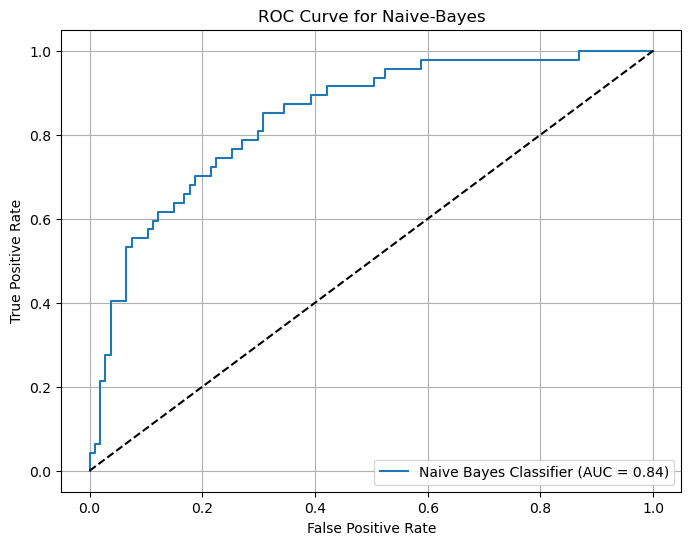

In [73]:
#ROC and AUV Curves
y_prob_nb = nb_classifier.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob_nb)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"Naive Bayes Classifier (AUC = {roc_auc:.2f})")
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naive-Bayes')
plt.legend(loc='lower right')
plt.grid()
plt.show()